<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content-dl/blob/fix_folder_names/tutorials/W1D1_BasicsAndPytorch/W1D1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Neuromatch Academy: Week 1, Day 1, Tutorial 1
# Pytorch

__Content creators:__ Shubh Pachchigar, Vladimir Haltakov, Matthew Sargent



__Content reviewers:__ Kelson Shilling-Scrivo, Deepak Raya

__Content editors:__ Anoop Kulkarni

__Production editors:__ Arush Tagade, Spiros Chavlis  

---
# Tutorial Objectives

Then have a few specific objectives for this tutorial:
* Learn about PyTorch and tensors
* Tensor Manipulations
* Data Loading
* GPUs and Cuda Tensors
* Train NaiveNet
* Get to know your pod
* Start thinking about the course as a whole


---

# Setup

Throughout your Neuromatch tutorials, most (probably all!) notebooks contain setup cells. These cells will import the required Python packages (e.g., PyTorch, numpy); set global or environment variables, and load in helper functions for things like plotting.

Be sure to run all of the cells in the setup section. Feel free to expand them and have a look at what you are loading in, but you should be able to fulfill the learning objectives of every tutorial without having to look at these cells.

If you start building your own projects built on this code base we highly recommend looking at them in more detail.

In [1]:
#@title Imports
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import time

---

In [2]:
#@title Helper Functions
def checkExercise1(A: torch.Tensor, B: torch.Tensor ,C:torch.Tensor, D:torch.Tensor):
  errors = []
  #TODO better errors
  if not torch.equal(A,torch.ones(20,21)):
    errors.append("A is not a 20 by 21 tensor of ones ")
  if not np.array_equal( B.numpy(),np.vander([1,2,3], 4)):
    errors.append("B is not a tensor containing the elements of Z ")
  if C.shape != (20,21):
    errors.append("C is not the correct shape ")
  if not torch.equal(D,torch.arange(4,41,step=2)):
    errors.append("D does not contain the correct elements")

  if errors == []:
    print("All correct!")

  else:
    print(errors)

def timeFun(f, iterations):
  iterations = iterations
  t_total = 0
  for _ in range(iterations):
    start = time.time()
    f()
    end = time.time()
    t_total += end - start
  print(f"time taken for {iterations} iterations of {f.__name__}: {t_total}")

# Section 1: Welcome to Neuromatch Deep learning course

Video available at https://youtu.be/ca21SNqt78I


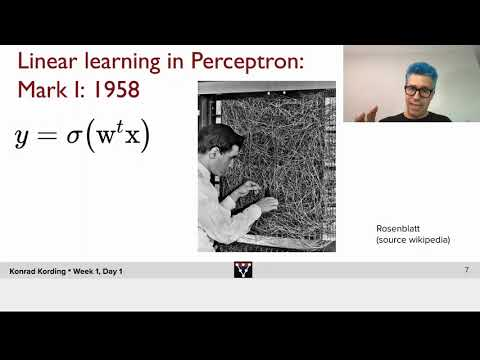

In [3]:

#@title Video 1.1: Welcome and History

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="ca21SNqt78I", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

*This will be an intensive 3 week adventure. We will all learn Deep Learning. In a group. Groups need standards. Read our 
[code of conduct](https://docs.google.com/document/d/1eHKIkaNbAlbx_92tLQelXnicKXEcvFzlyzzeWjEtifM/edit?usp=sharing).

Code of conduct

TODO: ADD EXERCISE: DESCRIBE WHAT YOU HOPE TO GET OUT OF THIS COURSE IN ABOUT 100 WORDS.



Video available at https://youtu.be/cDvAqG_hAvQ


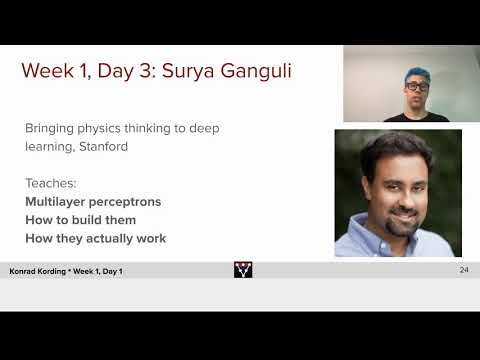

In [4]:

#@title Video 1.2: Syllabus
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="cDvAqG_hAvQ", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

Meet our lecturers:

Week 1: the building blocks
*   [Konrad Kording](https://kordinglab.com)
*   [Andrew Saxe](https://www.saxelab.org/)
*   [Surya Ganguli](https://ganguli-gang.stanford.edu/)
*   [Ioannis Mitliagkas](http://mitliagkas.github.io/)
*   [Lyle Ungar](https://www.cis.upenn.edu/~ungar/)

Week 2: making things work
* [Alona Fyshe](https://webdocs.cs.ualberta.ca/~alona/)
* [Alexander Ecker](https://eckerlab.org/)
* [James Evans](https://sociology.uchicago.edu/directory/james-evans)
* [He He](https://hhexiy.github.io/)
* [Vikash Gilja](https://tnel.ucsd.edu/bio) and [Akash Srivastava](https://akashgit.github.io/)

Week 3: more magic
* [Tim Lillicrap](https://contrastiveconvergence.net/~timothylillicrap/index.php) and [Blake Richards](https://www.mcgill.ca/neuro/blake-richards-phd)
* [Jane Wang](http://www.janexwang.com/)
* [Tim Lillicrap](https://contrastiveconvergence.net/~timothylillicrap/index.php) and [Blake Richards](https://www.mcgill.ca/neuro/blake-richards-phd)
* [Josh Vogelstein](https://jovo.me/) and [Vincenzo Lamonaco](https://www.vincenzolomonaco.com/)

Now, go to the visualization of ICLR papers. Read a few abstracts. Look at the various clusters. Where do you see yourself in this map?


# Section 2: The Basics of PyTorch

PyTorch is a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  A deep learning platform that provides significant flexibility
   and speed

At its core, PyTorch provides a few key features:

- A multidimensional [Tensor](https://pytorch.org/docs/stable/tensors.html) object, similar to [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) but with GPU acceleration.
- An optimized **autograd** engine for automatically computing derivatives.
- A clean, modular API for building and deploying **deep learning models**.

You can find more information about PyTorch in the appendix.

##Section 2.1: Creating Tensors


Video available at https://youtu.be/jGKd_4tPGrw


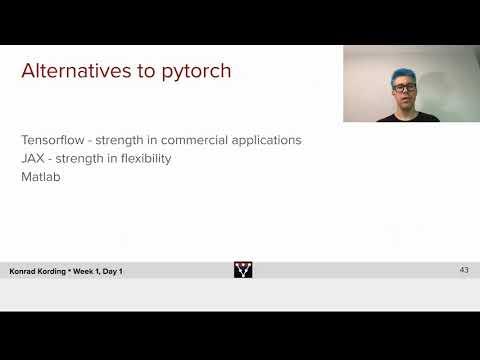

In [5]:

#@title Video 2.1: Making Tensors
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="jGKd_4tPGrw", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

There are various ways of creating tensors.

**Construct tensors directly:**

---



In [6]:
# we can construct a tensor directly from some common python iterables,
# such as list and tuple nested iterables can also be handled as long as the
# dimensions make sense

# tensor from a list
a = torch.tensor([0,1,2])

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)
print("Tensor a:", a)
print("Tensor b:", b)
print("Tensor c:", c)

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**Some common tensor constructors:**

---

In [7]:
# the numerical arguments we pass to these constructors
# determine the shape of the output tensor

x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1,5)
print("Tensor x:", x)
print("Tensor y:", y)
print("Tensor z:", z)

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[-8.9826e+04,  3.0809e-41,  3.3631e-44,  0.0000e+00,         nan]]])


Notice that ```.empty()``` does not return zeros, but seemingly random small numbers. Unlike ```.zeros()```, which initialises the elements of the tensor with zeros, ```.empty()``` just allocates the memory. It is hence faster if you are looking to just create a tensor.

**Creating random tensors and tensors like other tensors:**

---

In [8]:
# there are also constructors for random numbers

# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

# there are also constructors that allow us to construct
# a tensor according to the above constructors, but with
# dimensions equal to another tensor

c = torch.zeros_like(a)
d = torch.rand_like(c)

print("Tensor a: ", a)
print("Tensor b: ", b)
print("Tensor c: ", c)
print("Tensor d: ", d)

Tensor a:  tensor([[0.5090, 0.8934, 0.8421]])
Tensor b:  tensor([[ 0.6312, -0.5116, -0.5208,  0.1232],
        [ 1.0423,  1.2313,  1.6728,  0.0866],
        [ 1.9245, -0.5841, -0.3583, -1.0274]])
Tensor c:  tensor([[0., 0., 0.]])
Tensor d:  tensor([[0.1548, 0.2082, 0.2700]])


**Numpy-like number ranges:**
---
The ```.arange()``` and ```.linspace()``` behave how you would expect them to if you are familar with numpy.

In [9]:
a = torch.arange(0, 10, step=1)
b = np.arange(0, 10, step=1)

c = torch.linspace(0, 5, steps=11)
d = np.linspace(0, 5, num=11)

print("Tensor a: ", a)
print("Numpy array b: ", b)
print("Tensor c: ", c)
print("Numpy array d: ", d)

Tensor a:  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Numpy array b:  [0 1 2 3 4 5 6 7 8 9]
Tensor c:  tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])
Numpy array d:  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]



### Exercise 1: Creating Tensors

Below you will find some incomplete code. Fill in the missing code to construct the specified tensors.

We want the tensors: 

$A:$ 20 by 21 tensor consisting of ones

$B:$ a tensor with elements equal to the elements of numpy array $Z$

$C:$ a tensor with the same number of elements as $A$ but with values $
\sim U(0,1)$

$D:$ a 1D tensor containing the even numbers between 4 and 40 inclusive.


In [10]:
def tensor_creation(Z):
  """A function that creates various tensors.

  Args:
    Z (numpy.ndarray): An array of shape

  Returns:
    A : 20 by 21 tensor consisting of ones
    B : a tensor with elements equal to the elements of numpy array  Z
    C : a tensor with the same number of elements as A but with values ∼U(0,1)
    D : a 1D tensor containing the even numbers between 4 and 40 inclusive.
  """
  #################################################
  ## TODO for students: fill in the missing code
  ## from the first expression
  raise NotImplementedError("Student exercise: say what they should have done")
  #################################################
  A = ...
  B = ...
  C = ...
  D = ...

  return A, B, C, D

# numpy array to copy later
Z = np.vander([1, 2, 3], 4)

# Uncomment below to check your function!
# A, B, C, D = tensor_creation(Z)
# checkExercise1(A, B, C, D)

In [11]:
# to_remove solution

def tensor_creation(Z):
  """A function that creates various tensors.

  Args:
    Z (numpy.ndarray): An array of shape

  Returns:
    A : 20 by 21 tensor consisting of ones
    B : a tensor with elements equal to the elements of numpy array  Z
    C : a tensor with the same number of elements as A but with values ∼U(0,1)
    D : a 1D tensor containing the even numbers between 4 and 40 inclusive.
  """
  #################################################
  ## TODO for students: fill in the missing code
  ## from the first expression
  #raise NotImplementedError("Student exercise: say what they should have done")
  #################################################
  A = torch.ones(20, 21)
  B = torch.tensor(Z)
  C = torch.rand_like(A)
  D = torch.arange(4, 41, step=2)

  return A, B, C, D

# numpy array to copy later
Z = np.vander([1, 2, 3], 4)

# Uncomment below to check your function!
A, B, C, D = tensor_creation(Z)
checkExercise1(A, B, C, D)

All correct!


## Section 2.2: Operations in PyTorch

**Tensor-Tensor operations**

We can perform operations on tensors using methods under ```torch.``` 



Video available at https://youtu.be/R1R8VoYXBVA


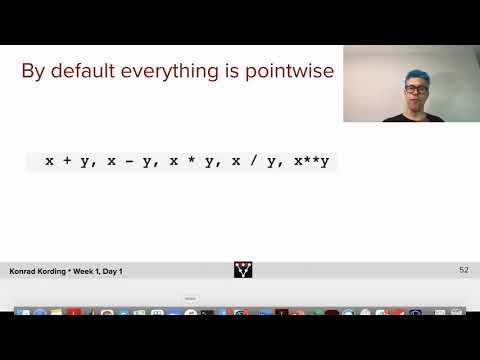

In [12]:

#@title Video 2.2: Tensor Operators
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="R1R8VoYXBVA", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

**Tensor-Tensor operations**

We can perform operations on tensors using methods under ```torch.``` 

In [13]:
a = torch.ones(5, 3)
b = torch.rand(5, 3)
c = torch.empty(5, 3)
d = torch.empty(5, 3)

torch.add(a, b, out=c)
torch.multiply(a, b, out=d)
print(c)
print(d)

tensor([[1.5665, 1.1651, 1.7991],
        [1.3879, 1.8185, 1.6948],
        [1.6689, 1.9624, 1.8728],
        [1.6330, 1.3626, 1.0559],
        [1.5817, 1.5250, 1.2628]])
tensor([[0.5665, 0.1651, 0.7991],
        [0.3879, 0.8185, 0.6948],
        [0.6689, 0.9624, 0.8728],
        [0.6330, 0.3626, 0.0559],
        [0.5817, 0.5250, 0.2628]])


However, in PyTorch most common Python operators are overridden.
The common standard arithmetic operators (+, -, *, /, and **) have all been lifted to elementwise operations

In [14]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y  # The ** operator is exponentiation

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

**Tensor Methods**

Tensors also have a number of common arithmetic operations built in. A full list of **all** methods can be found  in the appendix (there are a lot!) 

All of these operations should have similar syntax to their numpy equivalents.(Feel free to skip if you already know this!)

In [15]:
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print("Sum of every element of x: ", x.sum())
print("Sum of the columns of x: ", x.sum(axis=0))
print("Sum of the rows of x: ", x.sum(axis=1))
print("\n")

print("Mean value of all elements of x ", x.mean())
print("Mean values of the columns of x ", x.mean(axis=0))
print("Mean values of the rows of x ", x.mean(axis=1))

tensor([[0.1723, 0.0058, 0.6300],
        [0.7732, 0.8337, 0.5932],
        [0.1685, 0.8678, 0.1349]])


Sum of every element of x:  tensor(4.1794)
Sum of the columns of x:  tensor([1.1140, 1.7072, 1.3582])
Sum of the rows of x:  tensor([0.8081, 2.2000, 1.1712])


Mean value of all elements of x  tensor(0.4644)
Mean values of the columns of x  tensor([0.3713, 0.5691, 0.4527])
Mean values of the rows of x  tensor([0.2694, 0.7333, 0.3904])


**Matrix Operations**

The ```@``` symbol is overridden to represent matrix multiplication. You can also use ```torch.matmul()``` to multiply tensors. For dot multiplication, you can use ```.torch.dot()```, or manipulate the axes of your tensors and do matrix multiplication (we will cover that in the next section). 

Transposes of 2D tensors are obtained using ```torch.t()``` or ```Tensor.t```. Note the lack of brackets for ```Tensor.t``` - it is an attribute, not a method.

### Exercise 2 : Simple tensor operations

Below are two expressions involving operations on matrices. 

$$ \textbf{A} = 
\begin{bmatrix}2 &4 \\5 & 7 
\end{bmatrix} 
\begin{bmatrix} 1 &1 \\2 & 3
\end{bmatrix} 
 + 
\begin{bmatrix}10 & 10  \\ 12 & 1 
\end{bmatrix} 
$$


and


$$ b = 
\begin{bmatrix} 3 \\ 5 \\ 7
\end{bmatrix} \cdot 
\begin{bmatrix} 2 \\ 4 \\ 8
\end{bmatrix}
$$

The code block below that computes these expressions using PyTorch is incomplete - fill in the missing lines.



In [16]:
# Computing expression 1:

# init our tensors
a1 = torch.tensor([[2, 4], [5, 7]])

def simple_operations(a1):
################################################
## TODO for students: create the a2 and a3 matrices
## from the first expression
  raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  a2 = ...
  a3 = ...

  answer = ...
  return answer

## TODO for students: complete the function above and assign
## the result to a tensor named A

#A = simple_operations(a1)

#print(A)

In [17]:
# to_remove solution

# Computing expression 1:

# init our tensors
a1 = torch.tensor([[2, 4], [5, 7]])

def simple_operations(a1):
################################################
## TODO for students: create the a2 and a3 matrices
## from the first expression
  #raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  a2 = torch.tensor([[1, 1], [2, 3]])
  a3 = torch.tensor([[10, 10],[12, 1]])

  answer = a1 @ a2 + a3
  return answer

## TODO for students: compute the expression above and assign
## the result to a tensor named A

A = simple_operations(a1)

print(A)

tensor([[20, 24],
        [31, 27]])


In [18]:
# Computing expression 2:

def dot_product():
  ###############################################
  ## TODO for students: create the b1 and b2 matrices
  ## from the second expression
  raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  ###############################################
  b1 = ...
  b2 = ...
  product = ...
  return product

## TODO for students: compute the expression above and assign
## the result to a tensor named b

#b = dot_product()
#print(b)

In [19]:
# to_remove solution

# Computing expression 2:

def dot_product():
  b1 = torch.tensor([3, 5, 7])
  b2 = torch.tensor([2, 4, 8])
  product = torch.dot(b1, b2)

  return product

## TODO for students: compute the expression above and assign
## the result to a tensor named b

b = dot_product()
print(b)

tensor(82)


## Section 2.3 Manipulating Tensors in Pytorch



Video available at https://youtu.be/0d0KSJ3lJbg


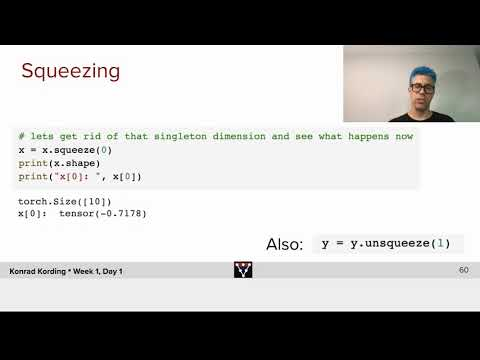

In [20]:

#@title Video 2.3: Tensor Indexing
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="0d0KSJ3lJbg", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

**Indexing**

Just as in numpy, elements in a tensor can be accessed by index. As in any numpy array, the first element has index 0 and ranges are specified to include the first but before the last element. We can access elements according to their relative position to the end of the list by using negative indices.

For example, [-1] selects the last element; [1:3] selects the second and the third elements, and [:-2] will select all elements excluding the last and second-to-last elements.

In [21]:
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3])
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


When we have multidimensional tensors, indexing rules work the same way as numpy.

In [22]:
# make a 5D tensor
x = torch.rand(1, 2, 3, 4, 5)

print(" shape of x[0]:", x[0].shape)
print(" shape of x[0][0]:", x[0][0].shape)
print(" shape of x[0][0][0]:", x[0][0][0].shape)

 shape of x[0]: torch.Size([2, 3, 4, 5])
 shape of x[0][0]: torch.Size([3, 4, 5])
 shape of x[0][0][0]: torch.Size([4, 5])


**Flatten and reshape**

There are various methods for reshaping tensors. It is common to have to express 2D data in 1D format. Similarly, it is also common to have to reshape a 1D tensor into a 2D tensor. We can achieve this with the ```.flatten()``` and ```.reshape()``` methods.

In [23]:
z = torch.arange(12).reshape(6, 2)
print("Original z: \n ", z)

# 2D -> 1D
z = z.flatten()
print("Flattened z: \n ", z)

# and back to 2D
z = z.reshape(3, 4)
print("Reshaped (3x4) z: \n", z)

Original z: 
  tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
  tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


You will also see the ```.view()``` methods used a lot to reshape tensors. There is a subtle difference between ```.view()``` and ```.reshape()```, though for now we will just use ```.reshape()```. The documentation can be found in the appendix.

**Squeezing tensors**

When processing batches of data, you will quite often be left with singleton dimensions. e.g. [1,10] or [256, 1, 3]. This dimension can quite easilly mess up your matrix operations if you don't plan on it being there...

In order to compress tensors along their singleton dimensions we can use the ```.squeeze()``` method. We can use the ```.unsqueeze()``` method to do the opposite. 


In [24]:
x = torch.randn(1, 10)
# printing the zeroth element of the tensor will not give us the first number!

print(x.shape)
print("x[0]: ", x[0])

torch.Size([1, 10])
x[0]:  tensor([-1.8598,  1.3801, -0.1977,  1.1682,  1.0583,  0.6316, -0.7814,  0.7965,
         1.1342,  0.7630])


 Because of that pesky singleton dimension, x[0] gave us the first row instead!



In [25]:
# lets get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print("x[0]: ", x[0])

torch.Size([10])
x[0]:  tensor(-1.8598)


In [26]:
# adding singleton dimensions works a similar way, and is often used when tensors
# being added need same number of dimensions

y = torch.randn(5, 5)
print("shape of y: ", y.shape)

# lets insert a singleton dimension
y = y.unsqueeze(1)
print("shape of y: ", y.shape)

shape of y:  torch.Size([5, 5])
shape of y:  torch.Size([5, 1, 5])


**Permutation**
Sometimes our dimensions will be in the wrong order! For example, we may be dealing with RGB images with dim [3x48x64], but our pipeline expects the colour dimension to be the last dimension i.e. [48x64x3]. To get around this we can use ```.permute()```


In [27]:
# `x` has dimensions [color,image_height,image_width]
x = torch.rand(3, 48, 64)

# we want to permute our tensor to be [ image_height , image_width , color ]
x = x.permute(1, 2, 0)
# permute(1,2,0) means:
# the 0th dim of my new tensor = the 1st dim of my old tensor
# the 1st dim of my new tensor = the 2nd
# the 2nd dim of my new tensor = the 0th
print(x.shape)

torch.Size([48, 64, 3])


**Concatenation**

In this example, we concatenate two matrices along rows (axis 0, the first element of the shape) vs. columns (axis 1, the second element of the shape). We can see that the first output tensor’s axis-0 length ( 6 ) is the sum of the two input tensors’ axis-0 lengths ( 3+3 ); while the second output tensor’s axis-1 length ( 8 ) is the sum of the two input tensors’ axis-1 lengths ( 4+4 ).

In [28]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


#concatenate them along rows
cat_rows = torch.cat((x, y), dim=0)

# concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


**Conversion to Other Python Objects**

Converting to a NumPy tensor, or vice versa, is easy. The converted result does not share memory. This minor inconvenience is actually quite important: when you perform operations on the CPU or on GPUs, you do not want to halt computation, waiting to see whether the NumPy package of Python might want to be doing something else with the same chunk of memory.

When converting to a numpy array, the information being tracked by the tensor will be lost i.e. the computational graph. This will be covered in detail when you are introduced to autograd tomorrow! 

In [29]:
x = torch.randn(5)
print(f"x: {x}  |  x type:  {x.type()}")

y = x.numpy()
print(f"y: {y}  |  y type:  {type(y)}")

z = torch.tensor(y)
print(f"z: {z}  |  z type:  {z.type()}")

x: tensor([ 0.0372, -0.4124,  0.2418,  0.3118,  0.0236])  |  x type:  torch.FloatTensor
y: [ 0.03719791 -0.41242608  0.24176528  0.31181666  0.02355394]  |  y type:  <class 'numpy.ndarray'>
z: tensor([ 0.0372, -0.4124,  0.2418,  0.3118,  0.0236])  |  z type:  torch.FloatTensor


To convert a size-1 tensor to a Python scalar, we can invoke the item function or Python’s built-in functions.

In [30]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### Exercise 3: Manipulating Tensors
Using a combination of the methods discussed above, complete the functions below.

**Function A** 

This function takes in two 2D tensors $A$ and $B$ and returns the column sum of A multiplied by the sum of all the elmements of $B$ i.e. a scalar. e.g:

 $ A = \begin{bmatrix}
1 & 1 \\
1 & 1 
\end{bmatrix}$  $ B = \begin{bmatrix}
1 & 2 & 3\\
1 & 2 & 3 
\end{bmatrix}$
$ Out = 12 *  \begin{bmatrix}
2 & 2\\
\end{bmatrix} = \begin{bmatrix}
24 & 24\\
\end{bmatrix}$

**Function B** 

This function takes in a square matrix $C$ and returns a 2D tensor consisting of a flattened $C$ with the index of each element appended to this tensor in the row dimension. e.g:

 $ C = \begin{bmatrix}
2 & 3 \\
-1 & 10 
\end{bmatrix}$
 $ Out = \begin{bmatrix}
0 & 2 \\
1 & 3 \\
2 & -1 \\
3 & 10
\end{bmatrix}$

**Hint:** pay close attention to singleton dimensions

**Function C (maybe cut this depending on time constraints)**

This function takes in two 2D tensors $D$ and $E$. If the dimensions allow it, this function returns the elementwise sum of $E$ reshaped into the dimensions of $D$, and $D$; else this function returns a 1D tensor that is the concatenation of the two tensors. e.g.

 $ D = \begin{bmatrix}
1 & -1 \\
-1 & 3 
\end{bmatrix}$
 $ E = \begin{bmatrix}
2 & 3 & 0 & 2 \\
\end{bmatrix}$
 $ Out = \begin{bmatrix}
3 & 2 \\
-1 & 5 
\end{bmatrix}$

 $ D = \begin{bmatrix}
1 & -1 \\
-1 & 3 
\end{bmatrix}$
 $ E = \begin{bmatrix}
2 & 3 & 0  \\
\end{bmatrix}$
 $ Out = \begin{bmatrix}
1 & -1 & -1 & 3  & 2 & 3 & 0  
\end{bmatrix}$

**Hint:** ```torch.numel()``` is an easy way of finding the number of elements in a tensor


In [31]:
################################################
## TODO for students: complete these functions

def functionA(A: torch.Tensor, B: torch.Tensor) -> torch.Tensor:
  ## TODO for students
  raise NotImplementedError("Student exercise: complete function A")
  output = torch.zeros(2)
  return output

def functionB(C: torch.Tensor) -> torch.Tensor:
  raise NotImplementedError("Student exercise: complete function B")

  # TODO flatten the tensor  C
  C = ...

  # TODO create the idx tensor to be concatenated to C
  idx_tensor = ...

  # TODO concatenate the two tensors
  output = ...

  output = torch.zeros(1)
  return output

def functionC(D: torch.Tensor, E: torch.Tensor) -> torch.Tensor:
  raise NotImplementedError("Student exercise: complete function C")
  # TODO check we can reshape E into the shape of D
  if ... :
    # TODO reshape E into the shape of D
    E = ...

    # TODO sum the two tensors
    output = ...

  else:
    # TODO flatten both tensors
    D = ...
    E = ...

    # TODO concatenate the two tensors in the correct dimension
    output = ...

  return output

##TODO: Implement the functions above and then uncomment the following lines to test your code
#print(functionA(torch.tensor([[1,1], [1,1]]), torch.tensor([ [1,2,3],[1,2,3] ]) ))
#print(functionB(torch.tensor([ [2,3],[-1,10] ])))
#print(functionC(torch.tensor([[1, -1],[-1,3]]), torch.tensor([[2,3,0,2]])))
#print(functionC(torch.tensor([[1, -1],[-1,3]]), torch.tensor([[2,3,0]])))

In [32]:
# to_remove solution

def functionA(A: torch.Tensor, B: torch.Tensor) -> torch.Tensor:
  ## TODO for students
  output = A.sum(axis = 0) * B.sum()
  return output

def functionB(C: torch.Tensor) -> torch.Tensor:


  # TODO flatten the tensor  C
  C = C.flatten()

  # TODO create the idx tensor to be concatenated to C

  # here we're going to do flatten and unsqueeze, but reshape can also be used
  idx_tensor = torch.arange(0, len(C))

  # TODO concatenate the two tensors
  output = torch.cat([idx_tensor.unsqueeze(0), C.unsqueeze(0)], axis = 1)

  return output

def functionC(D: torch.Tensor, E: torch.Tensor) -> torch.Tensor:

  # TODO check we can reshape E into the shape of D
  if torch.numel(D) == torch.numel(E) :
    # TODO reshape E into the shape of D
    E = E.reshape(D.shape)

    # TODO sum the two tensors
    output = D + E

  else:
    # TODO flatten both tensors
    # this time we'll use reshape to keep the singleton dimension
    D = D.reshape(1,-1)
    E = E.reshape(1,-1)

    # TODO concatenate the two tensors in the correct dimension
    output = torch.cat([D,E], axis = 1)

  return output

print(functionA(torch.tensor([[1,1], [1,1]]), torch.tensor([ [1,2,3],[1,2,3] ]) ))
print(functionB(torch.tensor([ [2,3],[-1,10] ])))
print(functionC(torch.tensor([[1, -1],[-1,3]]), torch.tensor([[2,3,0,2]])))
print(functionC(torch.tensor([[1, -1],[-1,3]]), torch.tensor([[2,3,0]])))

tensor([24, 24])
tensor([[ 0,  1,  2,  3,  2,  3, -1, 10]])
tensor([[ 3,  2],
        [-1,  5]])
tensor([[ 1, -1, -1,  3,  2,  3,  0]])


## Section 2.4: GPUs 


Video available at https://youtu.be/9Mc9GFUtILY


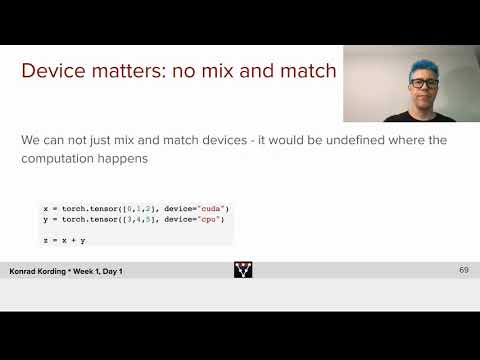

In [33]:

#@title Video 2.4: GPU vs CPU
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="9Mc9GFUtILY", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video


By default, when we create a tensor it will *not* live on the GPU! 

In [34]:
x = torch.randn(10)
print(x.device)

cpu


When using Colab notebooks by default will note have access to a GPU. In order to start using GPUs we need to request one. We can do this by going to the runtime tab at the top of the page. 

By following Runtime -> Change runtime type and selecting "GPU" from the Hardware Accelerator dropdown list, we can start playing with sending tensors to GPUs.

Once you have done this your runtime will restart and you will need to rerun the first setup cell to reimport PyTorch. Then proceed to the next cell.

(For more information on the GPU usage policy you can view in the appendix)

**Now we have a GPU**


The cell below should return True.

In [35]:
print(torch.cuda.is_available())

True


CUDA is an API developed by Nvidia for interfacing with GPUs. PyTorch provides us with a layer of abstraction, and allows us to launch CUDA kernels using pure Python. *NOTE I am assuming that GPU stuff might be covered in more detail on another day but there could be a bit more detail here*

In short, we get the power of parallising our tensor computations on GPUs, whilst only writing (relatively) simple Python!

Let's make some CUDA tensors!

In [36]:
# common device agnostic way of writing code that can run on cpu OR gpu
# that we provide for you in each of the tutorials
device = "cuda" if torch.cuda.is_available() else "cpu"

# we can specify a device when we first create our tensor
x = torch.randn(2, 2, device=device)
print(x.dtype)
print(x.device)

# we can also use the .to() method to change the device a tensor lives on
y = torch.randn(2,2)
print(f"y before calling to() |  device: {y.device} | dtype: {y.type()}")

y = y.to(device)
print(f"y after calling to() |  device: {y.device} | dtype: {y.type()}")

torch.float32
cuda:0
y before calling to() |  device: cpu | dtype: torch.FloatTensor
y after calling to() |  device: cuda:0 | dtype: torch.cuda.FloatTensor


**Operations between cpu tensors and cuda tensors**

Note that the type of the tensor changed after calling ```.to()```. What happens if we try and perform operations on tensors on devices?




In [37]:
x = torch.tensor([0, 1, 2], device="cuda")
y = torch.tensor([3, 4, 5], device="cpu")

#Uncomment the following line and run this cell
#z = x + y

We cannot combine cuda tensors and cpu tensors in this fashion. If we want to compute an operation that combines tensors on different devices, we need to move them first! We can use the ```.to()``` method as before, or the ```.cpu()``` and ```.cuda()``` methods.

Genrally in this course all Deep learning is done on the GPU and any computation is done on the CPU, so sometimes we have to pass things back and forth so you'll see us call



 

In [38]:
x = torch.tensor([0, 1, 2], device="cuda")
y = torch.tensor([3, 4, 5], device="cpu")
z = torch.tensor([6, 7, 8], device="cuda")

# moving to cpu
x = x.cpu()
print(x + y)

# moving to gpu
y = y.cuda()
print(y + z)

tensor([3, 5, 7])
tensor([ 9, 11, 13], device='cuda:0')


###Exercise 4: Just how much faster are GPUs?

Below is a simple function. Complete the second function, such that it is performs the same operations as the first function, but entirely on the GPU.

In [39]:
def simpleFun():
  x = torch.rand(10000, 10000)
  y = torch.rand_like(x)
  z = 2*torch.ones(10000, 10000)

  x = x * y
  x = x @ z


def simpleFunGPU():
  ###############################################
  ## TODO for students: recreate the above function, but
  ## ensure all computation happens  on the GPU
  raise NotImplementedError("Student exercise: fill in the missing code to create the tensors")
  x = ...
  y = ...
  z = ...

  x = ...
  y = ...


##TODO: Implement the function above and uncomment the following lines to test your code
#timeFun(simpleFun, iterations = 1 )
#timeFun(simpleFunGPU, iterations = 1)

In [40]:
#to_remove solution
def simpleFun():
  x = torch.rand(10000, 10000)
  y = torch.rand_like(x)
  z = 2*torch.ones(10000, 10000)

  x = x * y
  x = x @ z


def simpleFunGPU():
  x = torch.rand(10000, 10000).to("cuda")
  y = torch.rand_like(x).to("cuda")
  z = 2*torch.ones(10000, 10000).to("cuda")

  x = x * y
  x = x @ z

timeFun(simpleFun, iterations = 1)
timeFun(simpleFunGPU, iterations = 1)

time taken for 1 iterations of simpleFun: 29.128841400146484
time taken for 1 iterations of simpleFunGPU: 1.0173730850219727


## Section 2.5: Datasets and Dataloaders



Video available at https://youtu.be/LSkjPM1gFu0


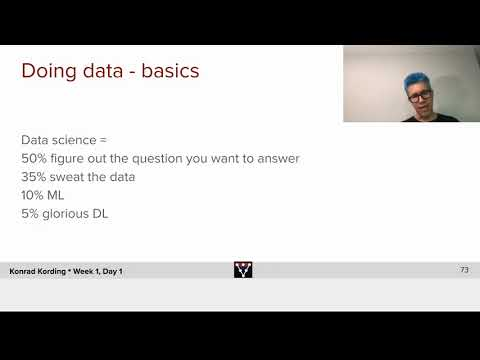

In [41]:

#@title Video 2.5: Getting Data

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="LSkjPM1gFu0", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

When training neural network models you will be working with large amounts of data. Fortunately, PyTorch offers some great tools that help you organize and manipulate your data samples.

**Datasets**

The `torchvision` package gives you easy access to many of the publicly available datasets. Let's load the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which contains color images of 10 different classes, like vehicles and animals.

Creating an object of type `datasets.CIFAR10` will automatically download and load all images from the dataset.


In [42]:
# Download and load the images from the CIFAR10 dataset
cifar10_data = datasets.CIFAR10(
    root="data",            # path where the images will be stored
    download=True,          # all images should be downloaded
    transform=ToTensor()    # transform the images to tensors
)

# Print the number of samples in the loaded dataset
print('Number of samples:', len(cifar10_data))


Extracting data/cifar-10-python.tar.gz to data
Number of samples: 50000


We have 50000 samples loaded. Now let's take a look at one of them in detail. Each sample consists of an image and its corresponding label.

In [43]:
import random

# Predefined label names
cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Choose a random sample
image, label = cifar10_data[random.randint(0, len(cifar10_data))]
print('Label:', cifar10_labels[label])
print('Image size:', image.shape)

Label: dog
Image size: torch.Size([3, 32, 32])


Color images are modeled as 3 dimensional tensors. The first dimension corresponds to the channels of the image (in this case we have RGB images). The second dimensions is the height of the image and the third is the width. We can denote this image format as C × H × W.

### Exercise 5: Display an image from the dataset

Let's try to display the image using `matplotlib`. The code below will not work, because `imshow` expects to have the image in a different format - H × W × C.

You need to reorder the dimensions of the tensor using the `permute` method of the tensor.

In [44]:
# TODO: Uncomment the following line to see the error that arises from the current image format
# plt.imshow(image)

# TODO: Comment the above line and fix this code by reordering the tensor dimensions
# plt.imshow(image.permute(...))

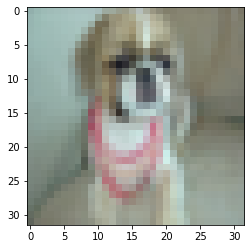

In [45]:
#to_remove solutions

# TODO: Uncomment the following line to see the error that arises from the current image format
# plt.imshow(image)

# TODO: Comment the above line and fix this code by reordering the tensor dimensions
plt.imshow(image.permute(1,2,0))

Video available at https://youtu.be/JokSIuPs-ys


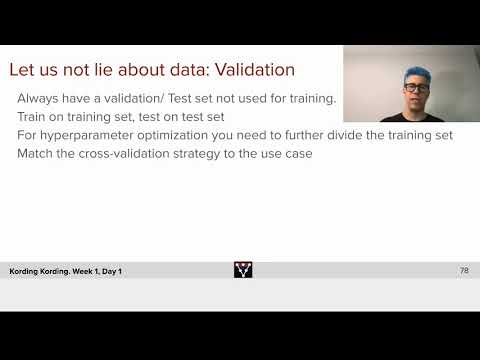

In [46]:
#@title Video 2.6: Train and Test

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="JokSIuPs-ys", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

**Training and Test Datasets**

When loading a dataset, you can specify if you want to load the training or the test samples using the `train` argument. We can load the training and test datasets separately.

In [47]:
# Load the training samples
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# Load the test samples
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


Video available at https://youtu.be/sjegA9OBUPw


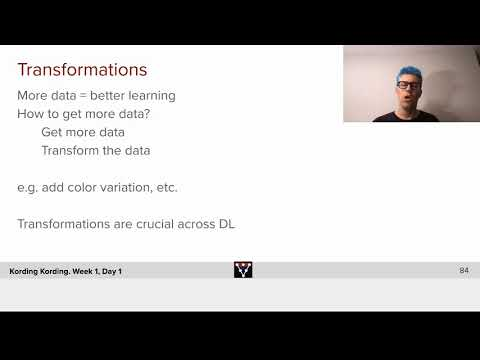

In [48]:
#@title Video 2.7: Data Augmentation - Transformations

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="sjegA9OBUPw", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

**Dataloader**

Another important concept is the `Dataloader`. It is a wrapper around the `Dataset` that splits it into minibatches (important for training the neural network) and makes the data iterable. The `shuffle` argument is used to shuffle the order of the samples across the minibatches.


In [49]:
# Create dataloaders with
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

We can now query the next batch from the data loader and inspect it. We can now see that we have a 4D tensor. This is because we have a 64 images in the batch and each image has 3 dimensions: channels, height and width.

Batch size: torch.Size([64, 3, 32, 32])


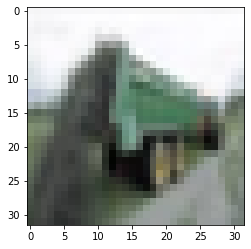

In [50]:
# Load the next batch
batch_images, batch_labels = next(iter(train_dataloader))
print('Batch size:', batch_images.shape)

# Display the first image from the batch
plt.imshow(batch_images[0].permute(1, 2, 0))

**Transformations**

Another useful feature when loading a dataset is applying transformations on the data - color conversions, normalization, cropping, rotation etc. There are many predefined transformations in the `torchvision.transforms` package and you can also combine them using the `Compose` transform.

### Exercise 6: Load the CIFAR10 dataset as grayscale images

The goal of this excercise is to load the images from the CIFAR10 dataset as grayscale images.

In [51]:
from torchvision.transforms import Compose, Grayscale

# TODO Load the CIFAR10 data using a transform that converts the images to grayscale tensors
# data = datasets.CIFAR10( ...

# TODO After implementing the above code, uncomment the following lines to test your code
# Display a random grayscale image
# image, label = data[random.randint(0, len(data))]
# plt.imshow(image.squeeze(), cmap="gray")

Files already downloaded and verified


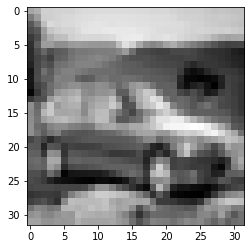

In [52]:
#to_remove solution

from torchvision.transforms import Compose, Grayscale

# TODO Load the CIFAR10 data using a transform that converts the images to grayscale tensors
data = datasets.CIFAR10(
    root="data",
    download=True,
    transform=Compose([ToTensor(),Grayscale()])
)


# Display a random grayscale image
image, label = data[random.randint(0, len(data))]
plt.imshow(image.squeeze(), cmap="gray")

#Section 3:  Neural Networks

Now it's time for you to create your first neural network using PyTorch. This section will walk you through the process of:
- Creating a simple neural network model
- Training the network
- Visualizing the results of the network
- Tweeking the network



Video available at https://youtu.be/JrC_UAJWYKU


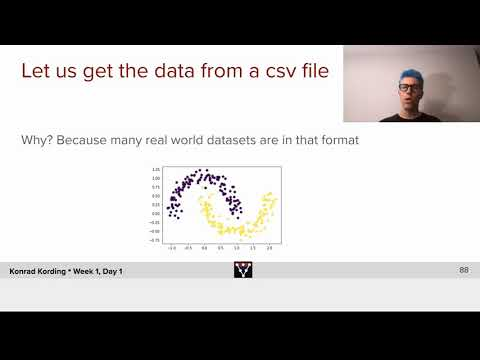

In [53]:

#@title Video 3.1: CSV Files

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="JrC_UAJWYKU", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

## Section 3.1: Data Loading

First we need some sample data to train our network on. You can use the function below to generate an example dataset consisting of 2D points along two interleaving half circles. The data will be stored in a file called `sample_data.csv`. You can inspect the file directly in Colab by going to Files on the left side and opening the CSV file.

In [54]:
#@title Generate sample data
import sklearn.datasets
import pandas as pd

# Create a dataset of 256 points with a little noise
X, y = sklearn.datasets.make_moons(256, noise=0.1)

# Store the data as a Pandas data frame and save it to a CSV file
df = pd.DataFrame(dict(x0=X[:,0], x1=X[:,1], y=y))
df.to_csv('sample_data.csv')

Now we can load the data from the CSV file using the Pandas library. Pandas provides many functions for reading files in varios formats. When loading data from a CSV file, we can reference the columns directly by their names.

Size X: (256, 2)
Size y: (256,)


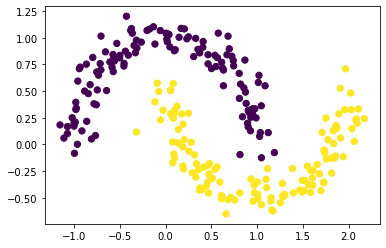

In [55]:
import pandas as pd

# Load the data from the CSV file in a Pandas DataFrame
data = pd.read_csv("sample_data.csv")

# Create a 2D numpy array from the x0 and x1 columns
X_orig = data[["x0", "x1"]].to_numpy()

# Create a 1D numpy array from the y column
y_orig = data["y"].to_numpy()

# Print the sizes of the generated 2D points X and the corresponding labels Y
print("Size X:", X_orig.shape)
print("Size y:", y_orig.shape)

# Visualize the dataset
plt.scatter(X_orig[:, 0], X_orig[:, 1], s=40, c=y_orig)

**Prepare Data for PyTorch**

Now let's prepare the data in a format suitable for PyTorch - convert everything into tensors.

In [56]:
# Convert the 2D points to a float tensor
X = torch.from_numpy(X_orig).type(torch.FloatTensor)
# Upload the tensor to the device
X = X.to(device)

print("Size X:", X.shape)

# Convert the labels to a long interger tensor
y = torch.from_numpy(y_orig).type(torch.LongTensor)
# Upload the tensor to the device
y = y.to(device)

print("Size y:", y.shape)

Size X: torch.Size([256, 2])
Size y: torch.Size([256])


Video available at https://youtu.be/PwSzRohUvck


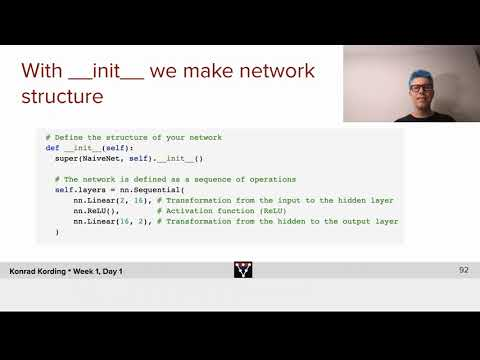

In [57]:
#@title Video 3.2: Generating the Neural Network

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="PwSzRohUvck", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

##Section 3.2: Create a Simple Neural Network

For this example we want to have a simple neural network consisting of 3 layers:
- 1 input layer of size 2 (our points have 2 coordinates)
- 1 hidden layer of size 16 (you can play with different numbers here)
- 1 output layer of size 2 (we want the have the scores for the two classes)

**Programing the Network**

PyTorch provides a base class for all neural network modules called [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). You need to inherit from `nn.Module` and implement some important methods:

#### `__init__`

In the `__init__` method you need to define the structure of your network. Here you will specify what layers will the network consist of, what activation functions will be used etc.

#### `forward`

All neural network modules need to implement the `forward` method. It specifies the computations the network needs to do when data is passed through it.

#### `predict`

This is not an obligatory method of a neural network module, but it is a good practice if you want to interpret the result of the network as a probability distribution.

#### `train`

This is also not an obligatory method, but it is a good practice to have. The method will be used to train the network parameters and will be implemented later in the notebook.


> Note that you can use the `__call__` method of a module directly and it will invoke the `forward` method: `net()` does the same as `net.forward()`.

In [58]:
import torch.nn.functional as F

# Inherit from nn.Module - the base class for neural network modules provided by Pytorch
class NaiveNet(nn.Module):

  # Define the structure of your network
  def __init__(self):
    super(NaiveNet, self).__init__()

    # The network is defined as a sequence of operations
    self.layers = nn.Sequential(
        nn.Linear(2, 16), # Transformation from the input to the hidden layer
        nn.ReLU(),        # Activation function (ReLU)
        nn.Linear(16, 2), # Transformation from the hidden to the output layer
    )

  # Specify the computations performed on the data
  def forward(self, x):
    # Pass the data through the layers
    return self.layers(x)

  # Convert the output of the network to a probability distribution
  def predict(self, x):
    # Pass the data through the networks
    output = self.forward(x)

    # Choose the label with the highest score
    return torch.argmax(output, 1)

  # Train the neural network (will be implemented later)
  def train(seld, X, y):
    pass

**Check that your network works**

Create an instance of your model and visualize it

In [59]:
# Create new NaiveNet and transfer it to the device
model = NaiveNet().to(device)

# Print the structure of the network
print(model)

NaiveNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
  )
)


### Exercise 7: Classify some samples

Now let's pass some of the points of our dataset through the network and see if it works. You should not expect the network to actually classify the points correctly, because it has not been trained yet.

In [60]:
#X_samples = ...
#print("Sample input:", X_samples)

# Do a forward pass of the network
#output = ...
#print("Network output:", output)

# Predict the label of each point
# y_predicted = ...
# print("Predicted labels:", y_predicted)

In [61]:
#to_remove solutions

X_samples = X[0:5]
print("Sample input:", X_samples)

# Do a forward pass of the network
output = model.forward(X_samples)
print("Network output:", output)

# Predict the label of each point
y_predicted = model.predict(X_samples)
print("Predicted labels:", y_predicted)

Sample input: tensor([[ 1.0978, -0.3260],
        [ 0.1407,  0.1415],
        [ 1.8632,  0.1707],
        [-0.9818,  0.3279],
        [ 0.6120, -0.4769]], device='cuda:0')
Network output: tensor([[-0.2164,  0.0090],
        [-0.1502, -0.1835],
        [-0.2787, -0.0822],
        [-0.0028, -0.3017],
        [-0.1717,  0.0339]], device='cuda:0', grad_fn=<AddmmBackward>)
Predicted labels: tensor([1, 0, 1, 0, 1], device='cuda:0')


## Section 3.3: Train Your Neural Network



Video available at https://youtu.be/4MIqnE4XPaA


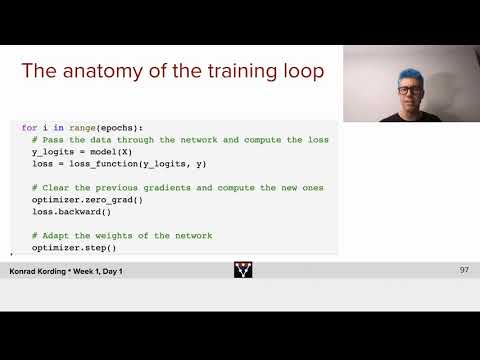

In [62]:

#@title Video 3.3: Train the Network

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="4MIqnE4XPaA", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

Now it is time to train your network on your dataset. We will not go into details of the training process for now - this will be covered in the next days. The goal for now is to see your network in action.

In [63]:
#@title Helper function to plot the decision boundary
from pathlib import Path

def plot_decision_boundary(model, X, y):
    # Transfer the data to the CPU
    X = X.cpu().numpy()
    y = y.cpu().numpy()

    # Check if the frames folder exists and create it if needed
    frames_path = Path("frames")
    if not frames_path.exists():
      frames_path.mkdir()

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points = torch.from_numpy(grid_points).type(torch.FloatTensor)
    Z = model.predict(grid_points.to(device)).cpu().numpy()
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

Epoch 0 loss is 0.6927616000175476
Epoch 1000 loss is 0.297054260969162
Epoch 2000 loss is 0.26566681265830994
Epoch 3000 loss is 0.25482869148254395
Epoch 4000 loss is 0.24392470717430115
Epoch 5000 loss is 0.2304065227508545
Epoch 6000 loss is 0.21427679061889648
Epoch 7000 loss is 0.19591102004051208
Epoch 8000 loss is 0.17593367397785187
Epoch 9000 loss is 0.1554105579853058
Epoch 10000 loss is 0.13584208488464355
Epoch 11000 loss is 0.11816240847110748
Epoch 12000 loss is 0.1028522327542305
Epoch 13000 loss is 0.08998838067054749
Epoch 14000 loss is 0.07937224954366684


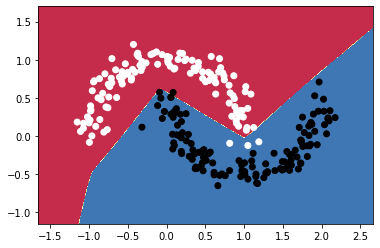

In [64]:
# Implement the train function
def train(self, X, y):
  # The Cross Entropy Loss is suitable for classification problems
  loss_function = nn.CrossEntropyLoss()

  # Create an optimizer (Stochastic Gradient Descent) that will be used to train the network
  learning_rate = 1e-2
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # Number of epochs
  epochs = 15000

  # List of losses for visualization
  losses = []

  for i in range(epochs):
    # Pass the data through the network and compute the loss
    y_logits = model(X)
    loss = loss_function(y_logits, y)

    # Clear the previous gradients and compute the new ones
    optimizer.zero_grad()
    loss.backward()

    # Adapt the weights of the network
    optimizer.step()

    # Store the loss
    losses.append(loss.item())

    # Print the results at every 1000th epoch
    if i % 1000 == 0:
      print(f"Epoch {i} loss is {loss.item()}")

      plot_decision_boundary(model, X, y)
      plt.savefig('frames/{:05d}.png'.format(i))

  return losses

# Replace the train function in the NaiveNet class
NaiveNet.train = train

# Create a new network instance a train it
model = NaiveNet().to(device)
losses = model.train(X, y)

**Plot the loss during training**

Plot the loss during the training to see how it reduces and converges.

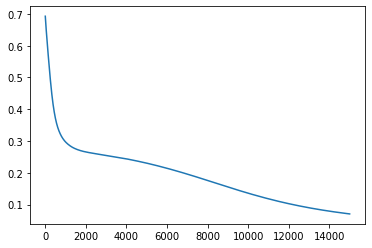

In [65]:
plt.plot(np.linspace(1, len(losses), len(losses)), losses)

In [66]:
#@title Visualize the training process
import imageio
images = []

for i in range(10):
    filename = "frames/0"+str(i)+"000.png"
    images.append(imageio.imread(filename))

imageio.mimsave('frames/movie.gif', images)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from pathlib import Path

gifPath = Path("frames/movie.gif")
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

Video available at https://youtu.be/_GGkapdOdSY


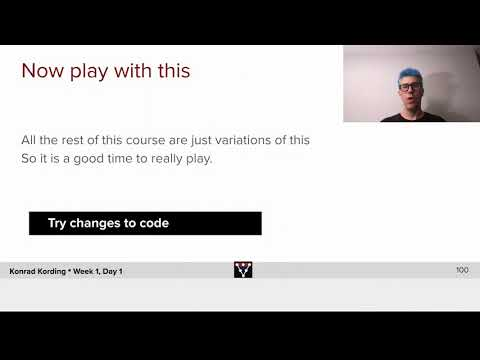

In [67]:
#@title Video 3.4: Play with it
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="_GGkapdOdSY", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

### Exercise 8: Tweak your Network

You can now play around with the network a little bit to get a feeling of what different parameters are doing. Here are some ideas what you could try:
- Increase or decrease the number of epochs for training
- Increase or decrease the size of the hidden layer
- Add one additional hidden layer

Can you get the network to better fit the data?

Video available at https://youtu.be/cnu7pyRx_u0


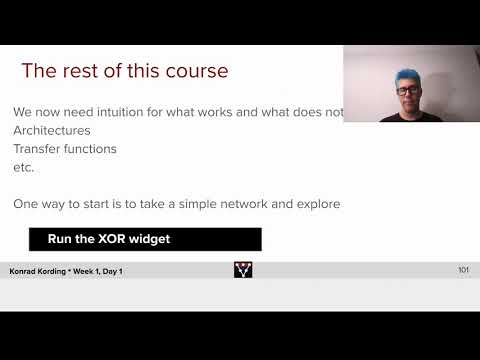

In [68]:
#@title Video 3.5: XOR Widget
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="cnu7pyRx_u0", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

### Exercise 9: Solving XOR

Here we use an open source and famous visualization widget developed by Tensorflow team available [here](https://github.com/tensorflow/playground).
* Play with the widget and observe that you can not solve the continuous XOR dataset
* Now add one hidden layer with three units, play with the widget, and set weights by hand to solve this dataset perfectly.

For the second part, you should set the weights by clicking on the connections and either type the value or use the up and down keys to change it by one increment. You could also do the same for the biases by clicking on the tiny square to each neuron's bottom left.
Even though there are infinitely many solutions, a neat solution when $f(x)$ is ReLU is: 

$$y = f(x_1)+f(x_2)-f((x_1+x_2))$$

Try to set the weights and biases to implement this function after you played enough :)

In [69]:
# @title Interactive Demo
from IPython.display import HTML
HTML('<iframe width="1020" height="660" src="https://playground.arashash.com/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.91390&showTestData=false&discretize=false&percTrainData=90&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false" allowfullscreen></iframe>')

In [70]:
#@markdown Do you think we can solve the discrete XOR (only 4 possibilities) with only 2 hidden units?
w1_min_xor = 'No' #@param ['Select', 'Yes', 'No']
if w1_min_xor == 'No':
  print("Correct!")
else:
  print("How about giving it another try?")

Correct!


Video available at https://youtu.be/Kt6JLi3rUFU


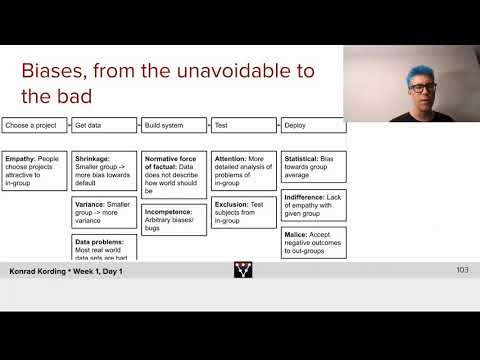

In [71]:
#@title Video 4: Ethics

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="Kt6JLi3rUFU", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

ETHICS: Let us watch the coded bias movie together and discuss

# Bonus

Video available at https://youtu.be/Sfp6--d_H1A


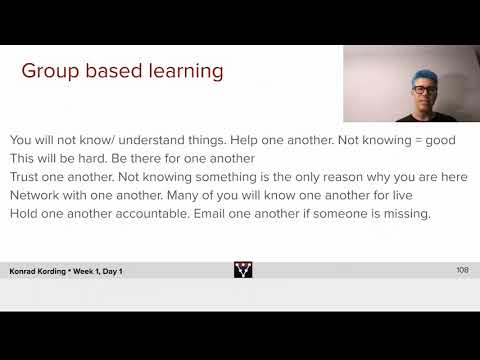

In [72]:
#@title Video 5: Be a group
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="Sfp6--d_H1A", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

Video available at https://youtu.be/JwTn7ej2dq8


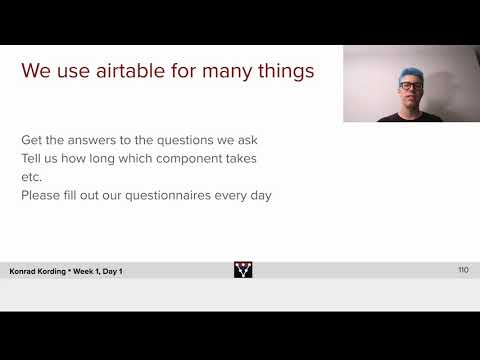

In [73]:
#@title Video 6: It's a wrap!
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="JwTn7ej2dq8", width=854, height=480, fs=1)
print("Video available at https://youtu.be/" + video.id)
video

---

#Appendix

## Official PyTorch resources:
###Tutorials
https://pytorch.org/tutorials/

### Documentation

 https://pytorch.org/docs/stable/tensors.html (tensor methods)

 https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view  (The view method in particular)

 https://pytorch.org/vision/stable/datasets.html (pre-loaded image datasets)

 ## Google Colab Resources:
 https://research.google.com/colaboratory/faq.html (FAQ including guidance on GPU usage)

 ## Books for reference 

 https://www.deeplearningbook.org/ (Deep Learning by Ian Goodfellow, Yoshua Bengio and Aaron Courville)

 